In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
N = 1000
y0 = np.array([N - 51, 1, 50, 0, 0, 0]) / N
y0_m1 = np.array([N - 51, 1, 50, 0, 0]) / N
span = [0, 60]
params = [0.5, 0, 0.5, 0.7, 0.4, 1/14, 1/7, 0.2, 0.05, 0.3, 0.1, 0.5, 0.01, 0.7]

def model_2(x, z, beta, b, epsilon, sigma, r1, gamma, eta, alpha, mu1, r2, r3, omega, mu2, delta):
  s, e, i, h, t, r = z
  dSdt = - beta * s * i * (1-b) - epsilon * beta * s * e * (1-b)
  dEdt = beta * s * i * (1-b) + epsilon * beta * s * e * (1-b) - sigma * e + r1 * r
  dIdt = sigma * e - gamma * i - eta * i - alpha * i - mu1 * i + r2 * h + r3 * t
  dHdt = eta * i - r2 * h - omega * h - mu2 * h
  dTdt = alpha * i - r3 * t - delta * t
  dRdt = delta * t + gamma * i + omega * h - r1 * r
  return [dSdt, dEdt, dIdt, dHdt, dTdt, dRdt]




beta = 0.5
b = 0
epsilon = 0.7
r1 = 0.4
r2 = 0.5
sigma = 0.9
gamma = 1/14
eta = 1/21
omega = 0.5
mu1 = 0.05
mu2 = 0.01
params_model_1 = [beta, b, epsilon, r1, r2, sigma, gamma, omega, mu1, mu2]
def model_1(x, z, beta, b, epsilon, r1, r2, sigma, gamma, omega, mu1, mu2):
  S, E, I, H, R = z
  dS_dt = -beta * S * I * (1-b)  - epsilon * beta * S * E * (1-b)
  dE_dt = beta * S * I * (1-b) + epsilon * beta * S * E * (1-b) - sigma * E + r1 * R
  dI_dt = sigma * E - gamma * I - eta * I - mu1 * I + r2 * H
  dH_dt = eta * I - omega * H - mu2 * H - r2 * H
  dR_dt = gamma * I + omega * H - r1 * R
  return np.array([dS_dt, dE_dt, dI_dt, dH_dt, dR_dt])



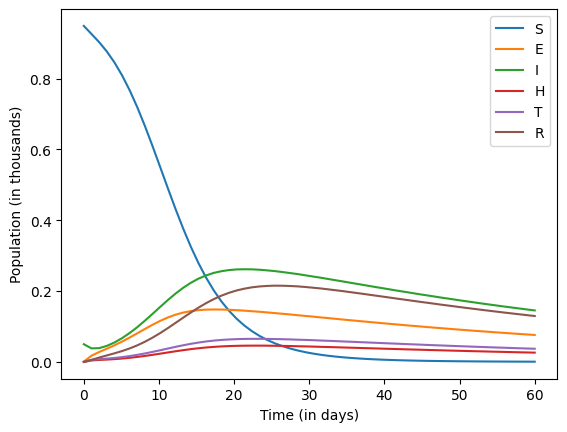

In [ ]:
sol = solve_ivp(model_2, [span[0], span[-1]], y0, args = params, dense_output=True)

t = np.linspace(span[0], span[-1], span[-1])

z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel("Time (in days)")
plt.ylabel("Population (in thousands)")
plt.legend(list("SEIHTR"))

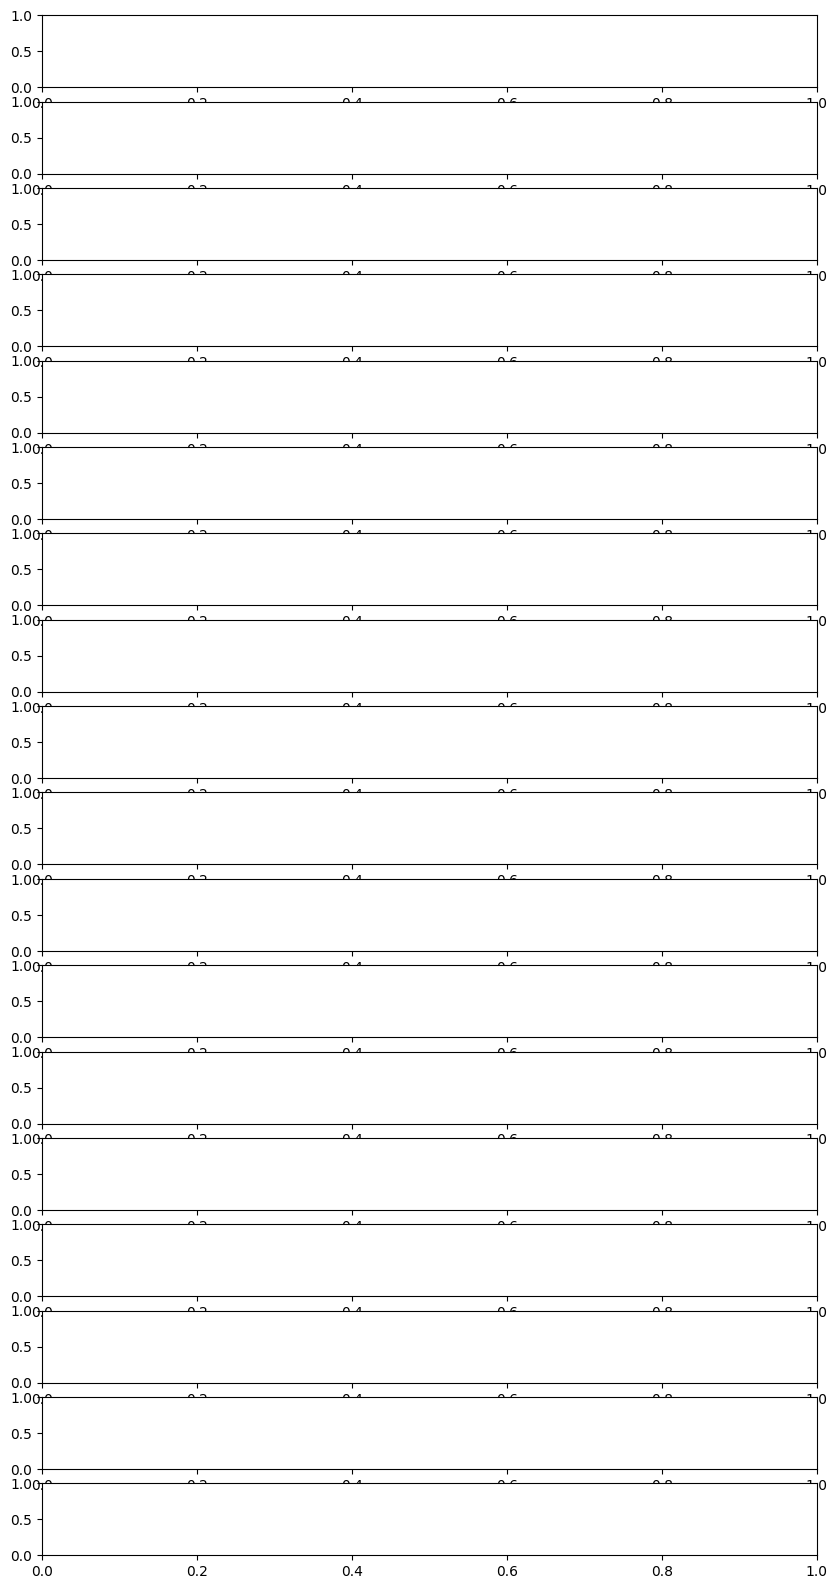

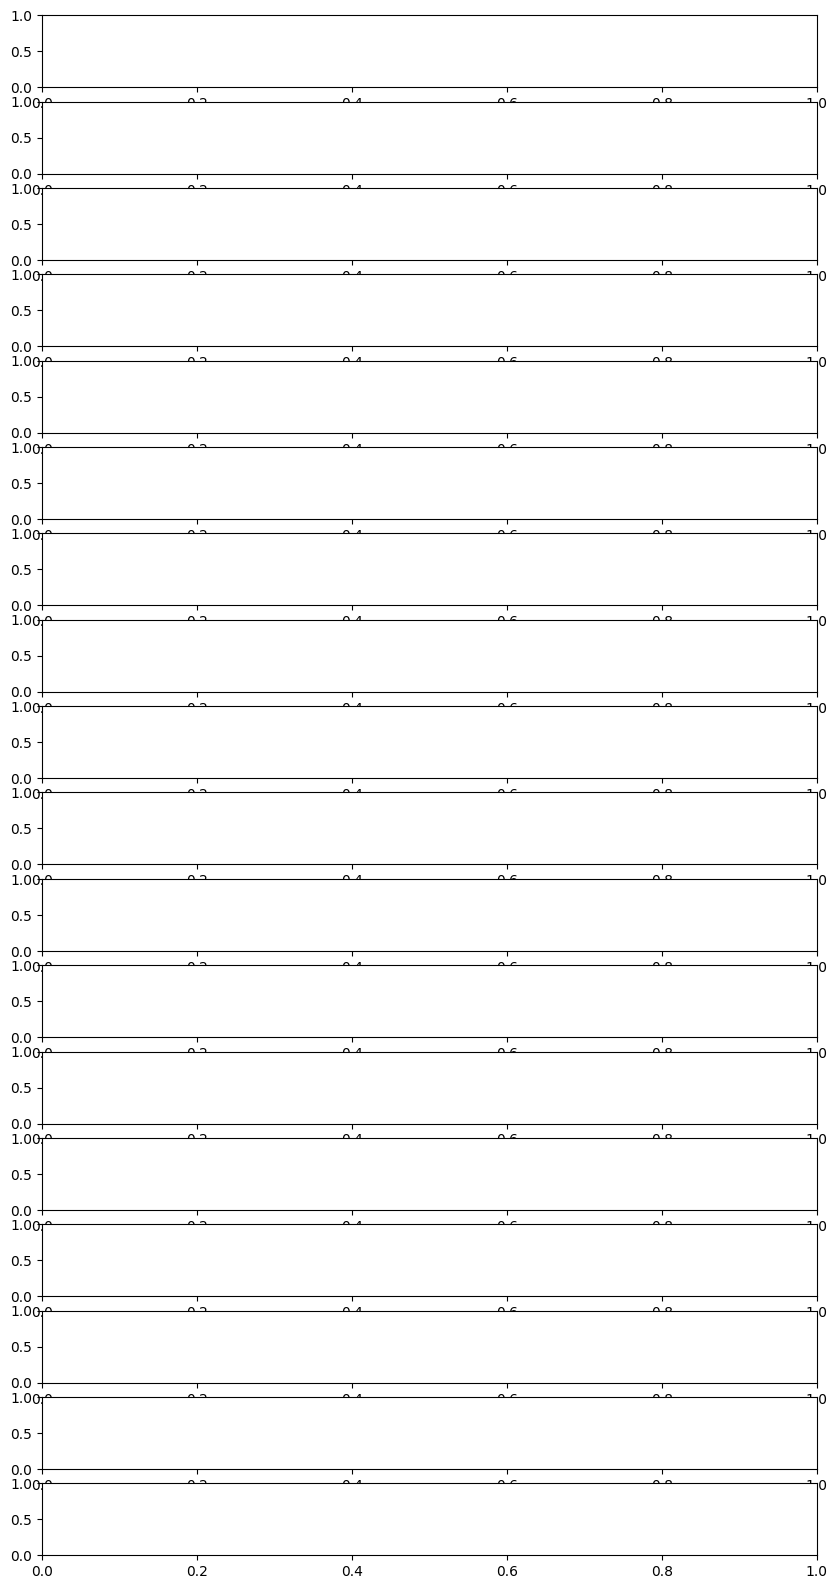

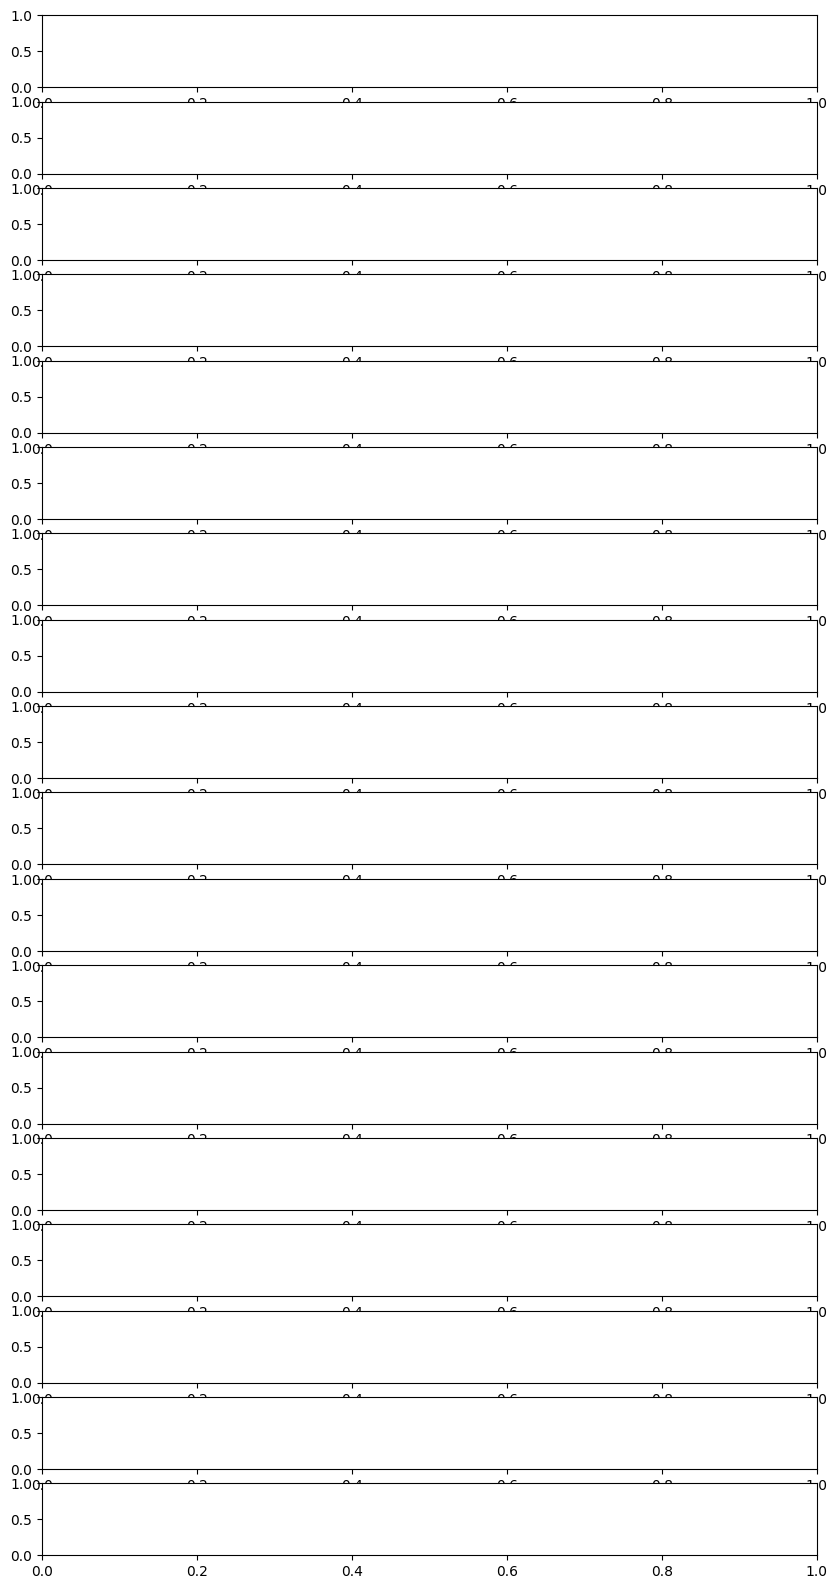

In [ ]:
def SEIHTR_forward(span, initial, params):
  return solve_ivp(model_2, span, initial, args = tuple(params), dense_output=True)

def SEIHR_forward(span, initial, params):
  return solve_ivp(model_1, span, initial, args = tuple(params), dense_output=True)

sol = SEIHTR_forward(span, y0, params)


betas = np.arange(0.1, 1, 0.05)
nplots = betas.size
fig, axes = plt.subplots(nrows=nplots, figsize=(10, 20))
max_infect_dict = {}  # keys are betas and values are the max infect
n_betas = betas.size
max_infect_array = np.zeros(shape=(n_betas, 4), dtype=float)

for i, (ax, beta) in enumerate(zip(axes, betas)):
  params[0] = beta
  sol = SEIHTR_forward(span, y0, params)
  t0, tn = span
  t = np.linspace(t0, tn, tn - t0)
  z = sol.sol(t)
  max_infect_dict[beta] = [max(z[1,:]), max(z[2,:]), max(z[1,:] + z[2,:])] #max of E, I and E + I
  max_infect_array[i, :] = [beta, max(z[1,:]), max(z[2,:]), max(z[1,:] + z[2,:])]

params = [0.5, 0, 0.5, 0.7, 0.4, 1/14, 1/7, 0.2, 0.05, 0.3, 0.1, 0.5, 0.01, 0.7]


etas = np.arange(0.1, 1, 0.05)
nplots = etas.size
fig, axes = plt.subplots(nrows=nplots, figsize=(10, 20))
max_infect_dict = {}  # keys are betas and values are the max infect
n_etas = etas.size
max_infect_array_eta = np.zeros(shape=(n_etas, 4), dtype=float)

for i, (ax, eta) in enumerate(zip(axes, etas)):
  params[6] = eta
  sol = SEIHTR_forward(span, y0, params)
  t0, tn = span
  t = np.linspace(t0, tn, tn - t0)
  z = sol.sol(t)
  max_infect_dict[eta] = [max(z[2,:]), max(z[3,:]), max(z[2,:] + z[3,:])] #max of E, I and E + I
  max_infect_array_eta[i, :] = [eta, max(z[2,:]), max(z[3,:]), max(z[2,:] + z[3,:])]



betas = np.arange(0.1, 1, 0.05)
nplots = betas.size
fig, axes = plt.subplots(nrows=nplots, figsize=(10, 20))
max_infect_dict_m1 = {}  # keys are betas and values are the max infect
n_betas = betas.size
max_infect_array_m1 = np.zeros(shape=(n_betas, 4), dtype=float)

for i, (ax, beta) in enumerate(zip(axes, betas)):
  params_model_1[0] = beta
  sol = SEIHR_forward(span, y0_m1, params_model_1)
  t0, tn = span
  t = np.linspace(t0, tn, tn - t0)
  z = sol.sol(t)
  max_infect_dict[beta] = [max(z[1,:]), max(z[2,:]), max(z[1,:] + z[2,:])] #max of E, I and E + I
  max_infect_array_m1[i, :] = [beta, max(z[1,:]), max(z[2,:]), max(z[1,:] + z[2,:])]

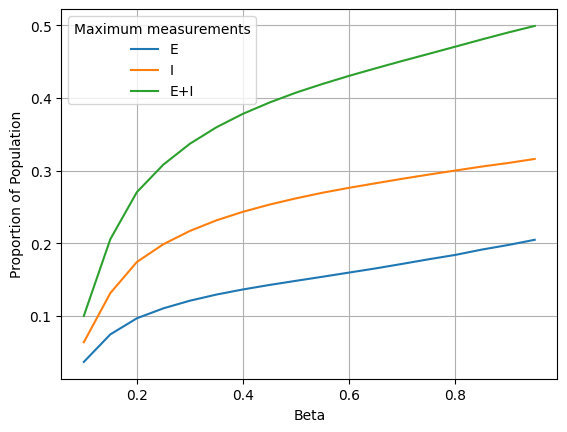

In [ ]:
plt.plot(betas, max_infect_array[:,1])
plt.plot(betas, max_infect_array[:,2])
plt.plot(betas, max_infect_array[:,3])
plt.xlabel("Beta")
plt.ylabel("Proportion of Population")
plt.legend(["E","I", "E+I"], title = "Maximum measurements")
plt.grid()

# ETA FIXED AT 1/7

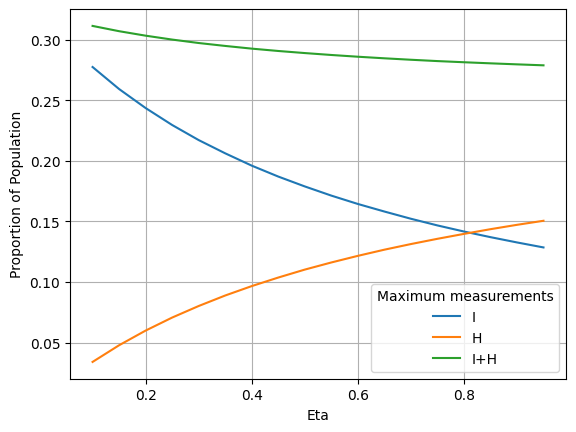

In [ ]:
plt.plot(etas, max_infect_array_eta[:,1])
plt.plot(etas, max_infect_array_eta[:,2])
plt.plot(etas, max_infect_array_eta[:,3])
plt.xlabel("Eta")
plt.ylabel("Proportion of Population")
plt.legend(["I","H", "I+H"], title = "Maximum measurements")
plt.grid()

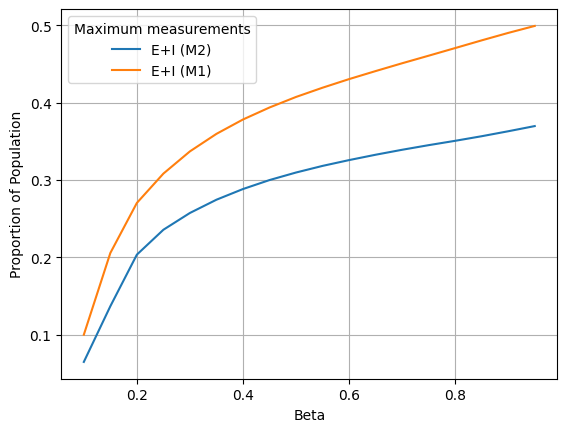

In [ ]:

plt.plot(betas, max_infect_array_m1[:,3])
plt.plot(betas, max_infect_array[:,3])


plt.xlabel("Beta")
plt.ylabel("Proportion of Population")
plt.legend(["E+I (M2)", "E+I (M1)"], title = "Maximum measurements")
plt.grid()

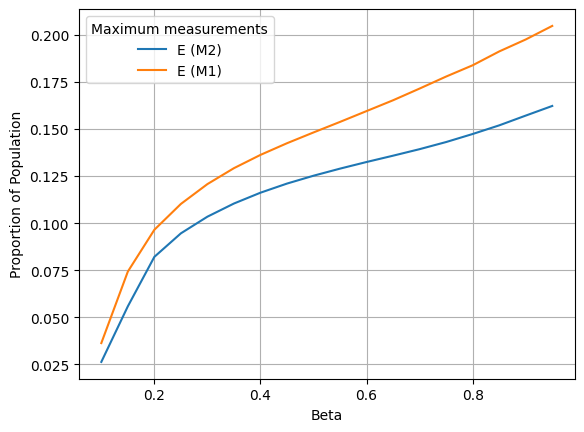

In [ ]:
plt.plot(betas, max_infect_array_m1[:,1])
plt.plot(betas, max_infect_array[:,1])


plt.xlabel("Beta")
plt.ylabel("Proportion of Population")
plt.legend(["E (M2)", "E (M1)"], title = "Maximum measurements")
plt.grid()

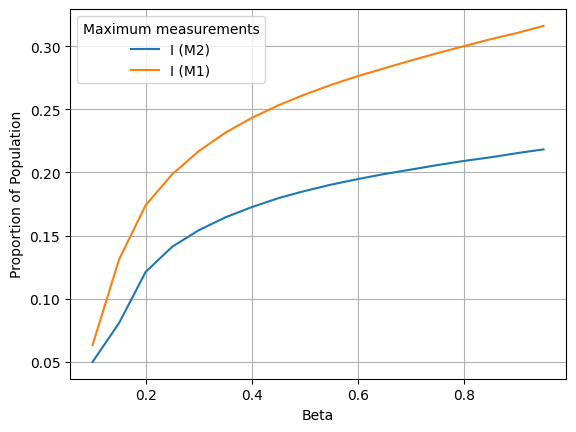

In [ ]:
plt.plot(betas, max_infect_array_m1[:,2])
plt.plot(betas, max_infect_array[:,2])


plt.xlabel("Beta")
plt.ylabel("Proportion of Population")
plt.legend(["I (M2)", "I (M1)"], title = "Maximum measurements")
plt.grid()

In [ ]:
def model2_peaks(beta, eta):
  params = [0.5, 0, 0.5, 0.7, 0.4, 1/14, 1/7, 0.2, 0.05, 0.3, 0.1, 0.5, 0.01, 0.7]
  params[0] = beta
  params[6] = eta
  t0, tn = span
  t = np.linspace(t0, tn, tn - t0)

  sol = SEIHTR_forward(span, y0, params)
  z = sol.sol(t)

  return np.max(z[2,:] + z[3,:])

model2_peaks_vectorized = np.vectorize(model2_peaks)

In [ ]:
beta_array = np.arange(0, 1, 0.01)
eta_array = np.arange(0, 1, 0.01)
beta_xx, eta_yy = np.meshgrid(beta_array, eta_array)

max_array_mesh = model2_peaks_vectorized(beta_xx, eta_yy)

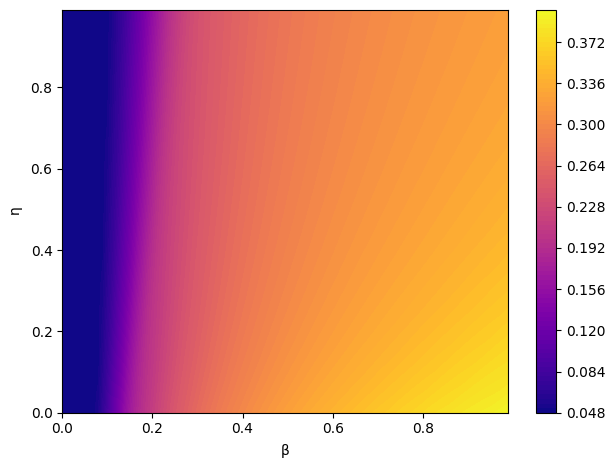

In [ ]:
fig, ax = plt.subplots()
cs = ax.contourf(beta_xx, eta_yy, max_array_mesh, 100, cmap="plasma")
ax.set_xlabel(r"$\mathregular{\beta}$")
ax.set_ylabel(r"$\mathregular{\eta}$")
fig.colorbar(cs, ax=ax)
fig.tight_layout()
fig.savefig("model2_contour_plot.png", dpi=300)
fig.show()